Import thư viện

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics

import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

Thực hiện các thao tác nhập dữ liệu, thống kê các thông tin cơ bản, xử lý dữ liệu bị thiếu.

In [2]:
df = pd.read_csv('titanic.csv')

Thống kê các thông tin cơ bản

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Survived   1309 non-null   int64  
 2   Name       1309 non-null   object 
 3   Sex        1309 non-null   object 
 4   Age        1046 non-null   float64
 5   SibSp      1309 non-null   int64  
 6   Parch      1309 non-null   int64  
 7   Ticket     1309 non-null   object 
 8   Fare       1308 non-null   float64
 9   Cabin      295 non-null    object 
 10  Embarked   1307 non-null   object 
 11  Boat       486 non-null    object 
 12  Body       121 non-null    float64
 13  Home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
df

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Xử lý dữ liệu bị thiếu

In [6]:
df['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

Có thể thấy thuộc tính ticket có đến 929 giá trị khác nhau, có khả năng thuộc tính này sẽ không giúp ích được trong quá trình khai thác, ngược lại còn gây sai số cho thuật toán nên ta có thể xóa nó đi và thực hiện xóa các thuộc tính không cần thiết.

In [7]:
df = df.drop(['Ticket'], axis=1)
df = df.drop(['Boat'], axis=1)
df = df.drop(['Body'], axis=1)
df = df.drop(['Home.dest'], axis=1)

Điền giá trị còn thiếu vào thuộc tính tuổi (age).Các giá trị này sẽ được sinh ngẫu nhiên dựa vào giá trị trung bình, độ lệch chuẩn và số các giá trị còn thiếu.

In [9]:
for dataset in [df]:
    mean = df["Age"].mean()
    std = df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    #compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated 
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df["Age"].astype(int)
df["Age"].isnull().sum()

0

Điền giá trị còn thiếu vào thuộc tính Cổng lên tàu (embarked).Xem xét thông tin về thuộc tính này.
Ta thấy, giá trị 'S' là phổ biến nhất, nên có thể chọn nó đề điền vào các vị trí còn trống.

In [10]:
df['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [11]:
common_value = 'S'
for dataset in [df]:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Survived  1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   int32  
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1309 non-null   object 
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 97.3+ KB


In [13]:
df.dropna()

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...
1189,3,1,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,16.7000,G6,S
1217,3,0,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19,0,0,7.6500,F G73,S
1230,3,0,"Strom, Miss. Telma Matilda",female,2,0,1,10.4625,G6,S
1231,3,0,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29,1,1,10.4625,G6,S


Sử dụng biểu đồ tần suất (Histogram) trong thư viện matplotlib để biểu diễn phân phối của lần lượt các thuộc tính Tuổi, Cổng tàu và Sống sót.

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

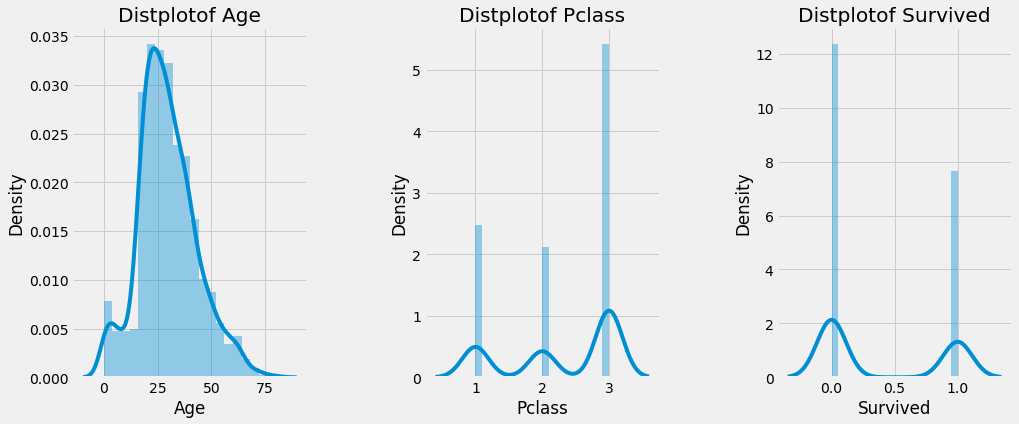

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['Age', 'Pclass', 'Survived']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace =0.5, wspace = 0.5)
    sns.distplot(df[x],bins= 20)
    plt.title('Distplotof {}'.format(x))
plt.show()

Thống kê số mẫu dữ liệu theo giới tính

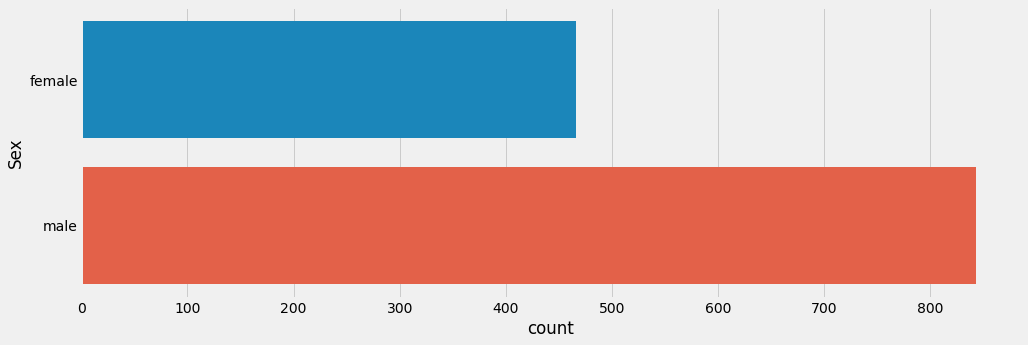

In [16]:
plt.figure(1, figsize= (15, 5))
sns.countplot(y = 'Sex', data = df)
plt.show()

Sử dụng biểu đồ phân tán (Scatter plot) để khảo sát phân bố của thuộc tính Tuổi và Cổng lên tàu theo Tỉ lệ sống sót.

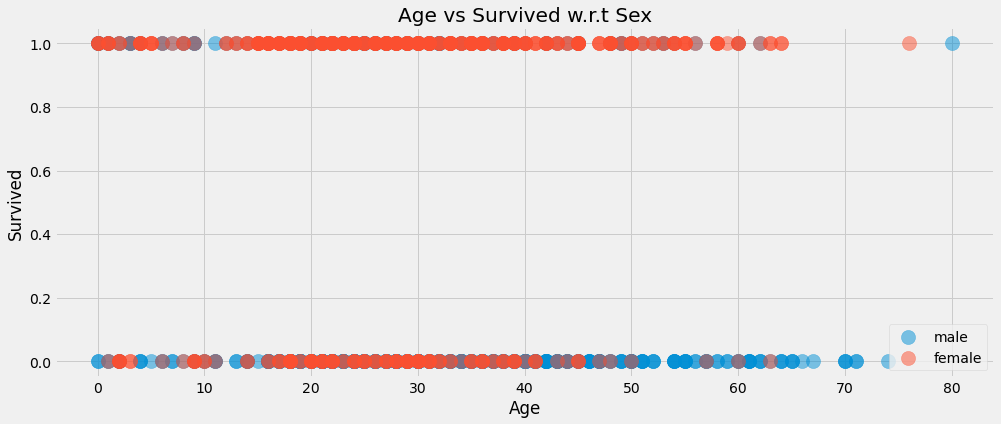

In [20]:
plt.figure(1, figsize= (15, 6))
for sex in ['male', 'female']:
    plt.scatter(x = 'Age', y = 'Survived', data = df[df['Sex'] == sex],
        s = 200, alpha = 0.5, label = sex)
plt.xlabel('Age'), plt.ylabel('Survived')
plt.title('Age vs Survived w.r.t Sex')
plt.legend()
plt.show()


Sử dụng biểu đồ phân tán (Scatter plot) để khảo sát phân bố của thuộc tính Cổng lên tàu và Tuổi theo Giới tính.

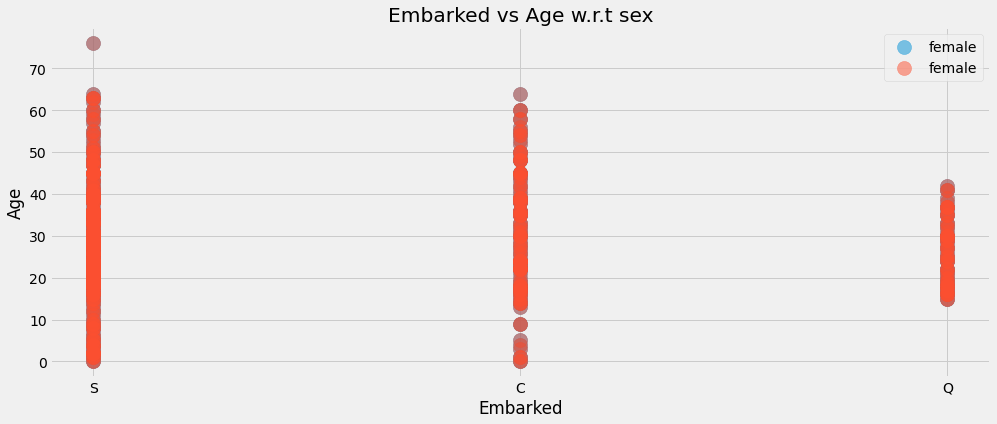

In [22]:
plt.figure(1, figsize= (15, 6))
for gender in ['male', 'female']:
    plt.scatter(x = 'Embarked', y = 'Age', data = df[df['Sex'] == sex],
        s = 200, alpha = 0.5, label = sex)
plt.xlabel('Embarked'), plt.ylabel('Age')
plt.title('Embarked vs Age w.r.t sex')
plt.legend()
plt.show()

Sử dụng phương pháp khuỷu tay (ELBOW method) để xác định số cụm cần thiết.

Khảo sát việc gom cụm theo thuộc tính Tuổi và Sống sót

In [23]:
X1 = df[['Age', 'Survived']].iloc[:, :].values
inertia = []
for n in range (1, 11):
    algorithm = KMeans (n_clusters = n, init='random')
    algorithm. fit (X1)
    inertia.append(algorithm. inertia_)

Vẽ biểu đồ biểu diễn giá trị Inertia, theo từng cách gom cụm k

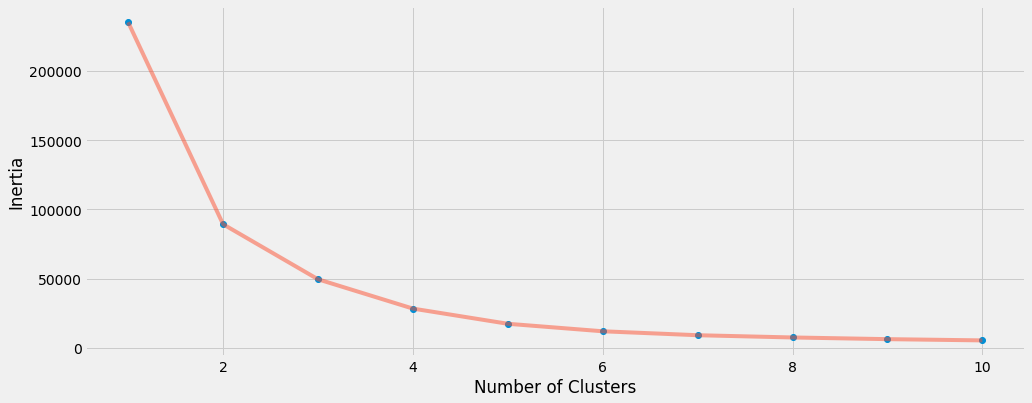

In [24]:
plt.figure(1, figsize= (15, 6))
plt.plot(np.arange (1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Tiến hành gom cụm dữ liệu Tuổi và Sống sót

In [27]:
algorithm = KMeans (n_clusters = 4, init='random')
algorithm.fit (X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

Biểu diễn kết quả gom cụm bằng biểu đồ

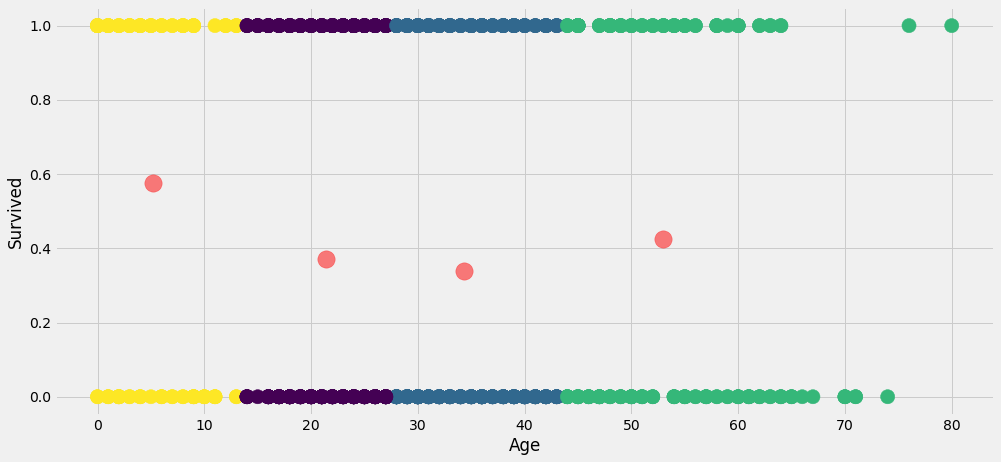

In [28]:
plt.figure(1, figsize = (15, 7))
plt.clf()
plt.scatter (x ='Age', y = 'Survived', data = df, c = labels1,s = 200)
plt.scatter (x= centroids1[:, 0], y = centroids1[:, 1], s = 300, c = 'red', alpha=0.5)
plt.ylabel('Survived'), plt.xlabel('Age')
plt.show()

Đánh giá kết quả gom cụm bằng Hệ số Dáng điệu (Silhouette coefficient)

In [29]:
metrics.silhouette_score (X1, labels1, metric = 'euclidean')

0.5567088752400899

Thực hiện tương tự với trường hợp gom cụm theo các thuộc tính:</br>
    - Số lượng người thân và Tuổi.</br>
    - Tuổi, Loại vé và Sống sót.

Số lượng người thân và Tuổi.

Khảo sát việc gom cụm theo thuộc tính Loại vé và Sống sót

In [31]:
X1 = df[['Age', 'Parch']].iloc[:, :].values
inertia = []
for n in range (1, 11):
    algorithm = KMeans (n_clusters = n, init='random')
    algorithm. fit (X1)
    inertia.append(algorithm. inertia_)

Vẽ biểu đồ biểu diễn giá trị Inertia, theo từng cách gom cụm k

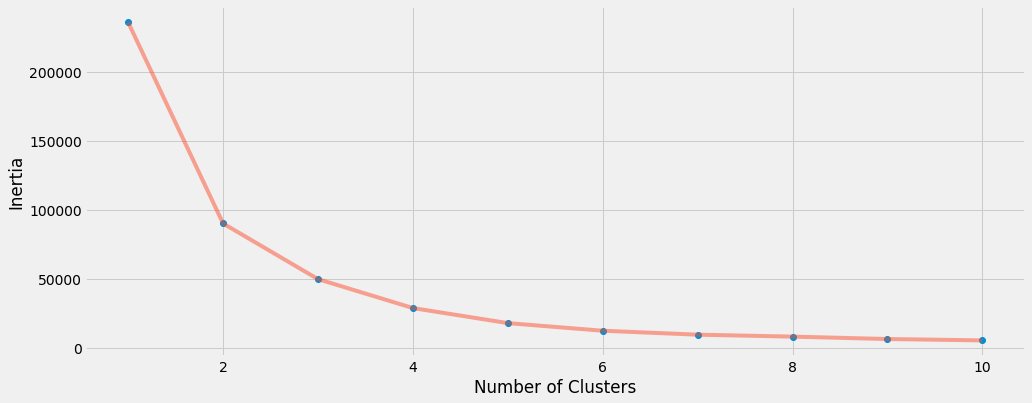

In [32]:
plt.figure(1, figsize= (15, 6))
plt.plot(np.arange (1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Tiến hành gom cụm dữ liệu Thu nhập hàng năm và Số điểm mua sắm

In [33]:
algorithm = KMeans (n_clusters = 4, init='random')
algorithm.fit (X1)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

Biểu diễn kết quả gom cụm bằng biểu đồ

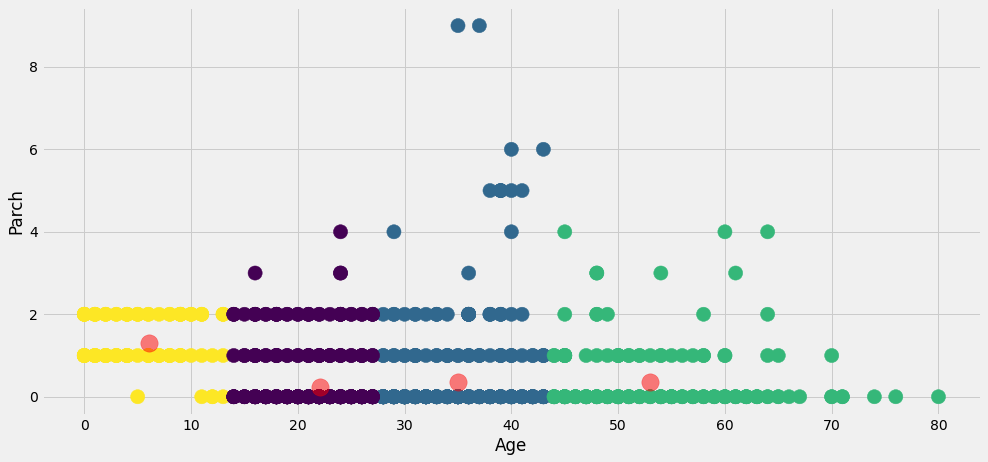

In [35]:
plt.figure(1, figsize = (15, 7))
plt.clf()
plt.scatter (x ='Age', y = 'Parch', data = df, c = labels1,s = 200)
plt.scatter (x= centroids2[:, 0], y = centroids2[:, 1], s = 300, c = 'red', alpha=0.5)
plt.ylabel('Parch'), plt.xlabel('Age')
plt.show()

Đánh giá kết quả gom cụm bằng Hệ số Dáng điệu (Silhouette coefficient)

In [36]:
metrics.silhouette_score (X1, labels2, metric = 'euclidean')

0.5485756096419708

Tuổi, Loại vé và Sống sót.

Tiến hành gom cụm dữ liệu Tuổi, Thu nhập hàng năm và Số điểm mua sắm

In [37]:
X1 = df[['Age','Pclass', 'Survived']].iloc[:, :].values
inertia = []
for n in range (1, 11):
    algorithm = KMeans (n_clusters = n, init='random')
    algorithm. fit (X1)
    inertia.append(algorithm. inertia_)

Vẽ biểu đồ biểu diễn giá trị Inertia, theo từng cách gom cụm k

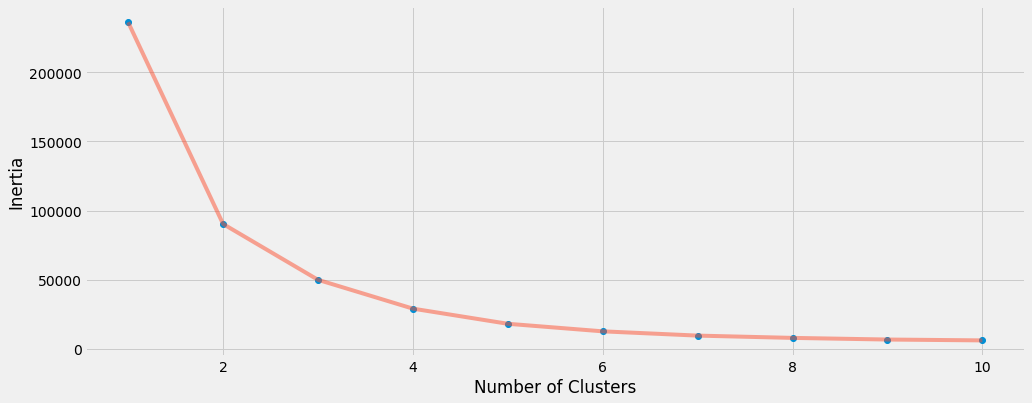

In [38]:
plt.figure(1, figsize= (15, 6))
plt.plot(np.arange (1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Tiến hành gom cụm dữ liệu Tuổi, Thu nhập hàng năm và Số điểm mua sắm

In [39]:
algorithm = KMeans (n_clusters = 4, init='random')
algorithm.fit (X1)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

Thực hiện vẽ biểu đồ 3D, biểu diễn kết quả gom cụm Tuổi, Thu nhập hằng năm và Số điểm mua sắm.

In [40]:
df['label3'] = labels3
trace1 = go.Scatter3d(
    x = df['Age'],
    y = df[ 'Pclass'],
    z = df['Survived'],
    mode='markers',
        marker=dict(
        color= df[ 'label3'], 
        size= 20,
        line=dict(
        color = df['label3'],
        width= 12
        ),
        opacity=0.8
    )
)
dat = [trace1]
layout = go.Layout(
    title = 'Clusters',
    scene = dict(
    xaxis = dict(title = 'Age'),
    yaxis = dict(title = 'Pclass'),
    zaxis = dict(title = 'Survived')
)
)
fig = go.Figure(data = dat, layout=layout)
py.offline.iplot(fig)